# 문서 유사도 - 코사인 유사도

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- line space 가 뭔데

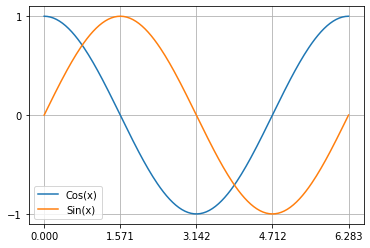

In [3]:
xs = np.linspace(0, 2* np.pi, 200)
cosx = np.cos(xs)
sinx = np.sin(xs)

plt.plot(xs, cosx, label = 'Cos(x)')
plt.plot(xs, sinx, label = 'Sin(x)')
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
plt.yticks([-1, 0, 1])
plt.grid()
plt.legend()
plt.show()

In [4]:
v1, v2, v3 = np.array([1, 1, 0]), np.array([2,1,0]), np.array([0, 0, 1])
v1_norm = np.sqrt(np.sum(np.square(v1)))
v2_norm = np.sqrt(np.sum(np.square(v2)))
v3_norm = np.sqrt(np.sum(np.square(v3)))
v1_norm , v2_norm, v3_norm

(1.4142135623730951, 2.23606797749979, 1.0)

In [5]:
# v1 v2 유사도
cos12 = np.dot(v1, v2) / (v1_norm * v2_norm)
cos12

0.9486832980505138

In [6]:
# v1 v3 유사도
cos13 = np.dot(v1, v3) / (v1_norm * v3_norm)
cos13

0.0

In [7]:
def cos_similarity(v1, v2):
    v1_norm = np.sqrt(np.sum(np.square(v1)))
    v2_norm = np.sqrt(np.sum(np.square(v2)))
    return np.dot(v1, v2) / (v1_norm * v2_norm)

In [9]:
cos_similarity(np.array([1,2,1,4,7,0]), np.array([0,2,1,4,7,3]))

0.9346635792723799

## 문장의 코사인 유사도

In [20]:
doc_list = ["I've been reading books of old",
"The legends and the myths",
"Achilles and his gold",
"Hercules and his gifts",
"Spiderman's control",]

### CountVectorizer를 활용한 코사인 유사도

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
cvec = CountVectorizer()
doc_cv = cvec.fit_transform(doc_list)
doc_cv.toarray()

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0],
       [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [13]:
d1, d2, d3 = doc_cv.toarray()[1], doc_cv.toarray()[2], doc_cv.toarray()[3]

In [15]:
print(f's1, s2 : {cos_similarity(d1, d2):.4f}')
print(f's1, s3 : {cos_similarity(d1, d3):.4f}')
print(f's3, s2 : {cos_similarity(d3, d2):.4f}')

s1, s2 : 0.1890
s1, s3 : 0.1890
s3, s2 : 0.5000


### TFIDF를 활용한 코사인 유사도

In [32]:
tvec = TfidfVectorizer()
doc_tv = tvec.fit_transform(doc_list)
doc_tv.toarray()

array([[0.        , 0.        , 0.40824829, 0.40824829, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.40824829, 0.40824829, 0.40824829, 0.        ,
        0.        , 0.40824829],
       [0.        , 0.26372909, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.39379499,
        0.39379499, 0.        , 0.        , 0.        , 0.        ,
        0.78758998, 0.        ],
       [0.56801408, 0.38040565, 0.        , 0.        , 0.        ,
        0.        , 0.56801408, 0.        , 0.45827018, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.38040565, 0.        , 0.        , 0.        ,
        0.56801408, 0.        , 0.56801408, 0.45827018, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.      

In [18]:
d1, d2, d3 = doc_cv.toarray()[1], doc_cv.toarray()[2], doc_cv.toarray()[3]

In [19]:
print(f's1, s2 : {cos_similarity(d1, d2):.4f}')
print(f's1, s3 : {cos_similarity(d1, d3):.4f}')
print(f's3, s2 : {cos_similarity(d3, d2):.4f}')

s1, s2 : 0.1890
s1, s3 : 0.1890
s3, s2 : 0.5000


### sklearn의 코사인 유사도(metrics)

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
cosine_similarity([d1], [d2])  # 리스트에 넣어줘야 됨

array([[0.18898224]])

In [28]:
cosine_similarity(doc_cv)

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.18898224, 0.18898224, 0.        ],
       [0.        , 0.18898224, 1.        , 0.5       , 0.        ],
       [0.        , 0.18898224, 0.5       , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [29]:
cosine_similarity(doc_cv, doc_cv)

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.18898224, 0.18898224, 0.        ],
       [0.        , 0.18898224, 1.        , 0.5       , 0.        ],
       [0.        , 0.18898224, 0.5       , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [34]:
cosine_similarity(doc_tv, doc_tv)

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.10032404, 0.10032404, 0.        ],
       [0.        , 0.10032404, 1.        , 0.35472002, 0.        ],
       [0.        , 0.10032404, 0.35472002, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])